In [38]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Overview

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

Null hypothesis:  There is no difference in network latency since switching providers.  latency_before = latency_after

Alternative hypothesis:  There is a difference. latency_before != latency_after

True positive:  There is a difference

True negative:  No difference

Type 1 error. Reject the null and accept there may be a difference even though the latency is the same.

Type 2 error. Accept the null hypothesis that latency_before=latency after when there is a difference in latency.

Is the website redesign any good?

Null hypothesis: The website redesign is not better than it was before. redesign <= before

Alternative hypothesis: The redesign is better.  redesign > before

True positive:  redesign not any better

True negative:  redesign is better

Type one error: conclude that there is sufficient evidence to show that the redesign is better than before while it actually isn't

Type two error: conclude the redesign is not better than before when it actually is

Is our television ad driving more sales?

Null hypothesis: the television ad is not having any affect on sales (or worse)

Alternative hypothesis: the ad is driving more sales (set up as a one tail)

True positive: The ad is driving more sales

True negative: The ad has no effect

Type one error:  Conclude that there is evidence to show the ad is driving more sales when it isn't

Type two error:  Conclude that there is evidence that the ad is having no effect on revenue (or lower effect) when it in fact is driving more sales

# Comparison of Means

1.a. Answer with the type of test you would use (assume normal distribution):
Is there a difference in grades of students on the second floor compared to grades of all students?

would set up a one sample two tailed t test to compare the grades of students on the second floor to all students

b.  Are adults who drink milk taller than adults who dont drink milk?

would set up a independent one tailed t test to compare the two populations the heights of the ones who do and those who don't drink milk

c. Is the the price of gas higher in texas or in new mexico?

I would set up a independent two tailed t test to compare the price of gas between the two states

d.  Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

I would set up a independent t test to compare the stress levels between the two


2.  Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [106]:
n1 = 40
μ1 = 90
σ1 = 15
office1 = np.random.normal(μ1, σ1, n1)
n2 = 50
μ2 = 100
σ2 = 20
office2 = np.random.normal(μ2, σ2, n2)


In [107]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [108]:
#test for equal variances 
#mini null: equal
#mini alt: unequal
#mini α < .05
stat, pval = stats.levene(office1, office2)
stat, pval# not enough evidence to reject null

(0.00667377632070603, 0.9350762199570695)

In [109]:
#Null hypothesis: There is no significant difference in the time it takes to sell homes in the two offices i.e. μ1 == μ2
#Alternative:  There is a difference μ1 != μ2 I will set up a two tail since it may have an effect both ways
# choose an α = .05
t, p = stats.ttest_ind(office1, office2, equal_var=True)
t, p

#not enoug evidence to reject the null hypothesis so there seems no significant difference between the two

(-1.6125240137365173, 0.11042872864105556)

In [116]:
#or
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=True)
t_stat, pval #in this case we have enough to reject the null hypothesis

(-2.6252287036468456, 0.01020985244923939)

3.  Load the mpg dataset and use it to answer the following questions:
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [31]:
 #two tailed
from pydataset import data
mpg = data('mpg')
mpg = mpg.assign(harmonic_mean = 2/(1/mpg.cty + 1/mpg.hwy))

In [32]:
nineteen_ninety_nine_cars = mpg[mpg.year == 1999]
two_thousand_eight_cars = mpg[mpg.year == 2008]

In [118]:
nineteen_ninety_nine_cars.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,3.281197,1999.0,5.692308,17.017094,23.427350,19.682388
std,1.260058,0.0,1.545079,4.458589,6.084628,5.084329
min,1.600000,1999.0,4.000000,11.000000,15.000000,12.692308
25%,2.200000,1999.0,4.000000,14.000000,17.000000,15.354839
50%,3.000000,1999.0,6.000000,17.000000,25.000000,19.902439
75%,4.000000,1999.0,6.000000,19.000000,26.000000,21.955556
max,6.500000,1999.0,8.000000,35.000000,44.000000,38.987342


<Axes: >

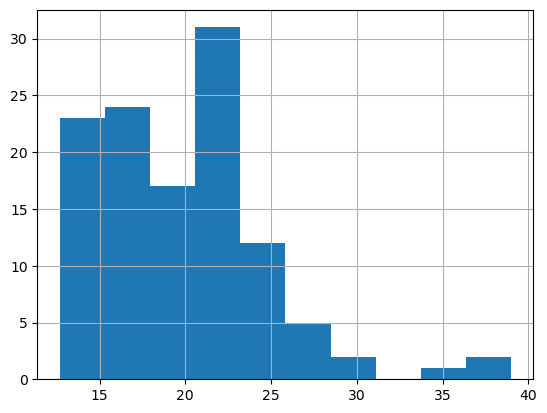

In [119]:
nineteen_ninety_nine_cars.harmonic_mean.hist()

In [34]:
two_thousand_eight_cars.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,117.000000,117.0,117.00000,117.000000,117.000000,117.000000
mean,3.662393,2008.0,6.08547,16.700855,23.452991,19.488663
std,1.300645,0.0,1.65869,4.056211,5.847923,4.748772
min,1.800000,2008.0,4.00000,9.000000,12.000000,10.285714
25%,2.500000,2008.0,4.00000,13.000000,18.000000,15.437500
50%,3.600000,2008.0,6.00000,17.000000,24.000000,19.512195
75%,4.700000,2008.0,8.00000,20.000000,28.000000,22.978723
max,7.000000,2008.0,8.00000,28.000000,37.000000,31.876923


<Axes: >

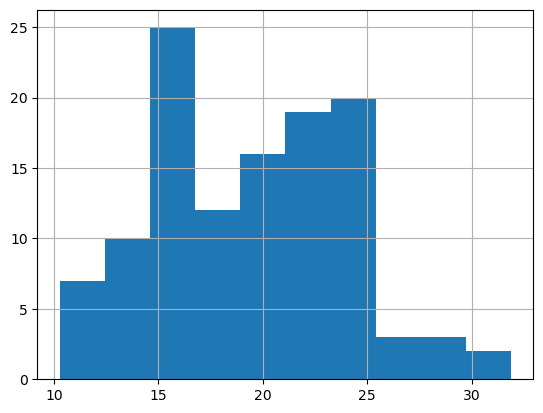

In [120]:
two_thousand_eight_cars.harmonic_mean.hist()

In [41]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(nineteen_ninety_nine_cars.harmonic_mean, two_thousand_eight_cars.harmonic_mean)

In [42]:
pval

0.8602339200830025

In [44]:
t, p = stats.ttest_ind(nineteen_ninety_nine_cars.harmonic_mean, two_thousand_eight_cars.harmonic_mean, equal_var=True)

In [45]:
t, p

(0.3011962975077886, 0.7635345888327115)

In [121]:
#We do not have the significance level so we fail to reject the null, there is no evidence that there is a difference

Are compact cars more fuel-efficient than the average car?

In [122]:
compact = mpg[mpg['class'] == 'compact']
compact.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000
mean,2.325532,2003.212766,4.595745,20.12766,28.297872,23.500417
std,0.452274,4.539374,0.900714,3.38550,3.781620,3.572665
min,1.800000,1999.000000,4.000000,15.00000,23.000000,18.750000
25%,2.000000,1999.000000,4.000000,18.00000,26.000000,21.272727
50%,2.200000,1999.000000,4.000000,20.00000,27.000000,22.978723
75%,2.800000,2008.000000,6.000000,21.00000,29.000000,24.360000
max,3.300000,2008.000000,6.000000,33.00000,44.000000,37.714286


In [124]:
#Null hypothesis:  There is no difference between the two  compact.harmonic_mean == non_compact.harmonic_mean
#Alternative Hypothesis:  There is a difference
#α < .025 one tailed

non_compact = mpg[mpg['class'] != 'compact']
non_compact.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,3.759893,2003.572193,6.213904,16.037433,22.219251,18.601569
std,1.274711,4.511500,1.588676,4.059198,5.780953,4.711123
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.285714
25%,2.500000,1999.000000,4.000000,13.000000,17.000000,14.915054
50%,3.800000,2008.000000,6.000000,15.000000,22.000000,17.837838
75%,4.700000,2008.000000,8.000000,18.000000,26.000000,21.590909
max,7.000000,2008.000000,8.000000,35.000000,44.000000,38.987342


In [125]:
stat, pval = stats.levene(compact.harmonic_mean, non_compact.harmonic_mean)
stat, pval #for equal variances

(7.730287593946991, 0.005875923121564377)

In [58]:
t, p = stats.ttest_ind(compact.harmonic_mean, non_compact.harmonic_mean, equal_var = False)
t, p

(7.841809963307849, 8.271751245887691e-12)

#There is sufficient evidence to reject the null hypothesis and suggest that there is a difference between compact cars and non-compact cara

Do manual cars get better gas mileage than automatic cars?

In [126]:
#Null hypothesis:   manual.harmonic_mean <= automatic.harmonic_mean
#Alternative Hypothesis:  manual.harmonic_mean > automatic.harmonic_mean
#α < .05 one tailed
manual = mpg[mpg.trans.str.contains('manual')]
manual.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.966234,2002.974026,5.246753,18.675325,25.779221,21.629229
std,1.187059,4.498462,1.479294,4.488118,5.961772,5.066126
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.285714
25%,2.000000,1999.000000,4.000000,15.000000,23.000000,18.461538
50%,2.500000,1999.000000,4.000000,18.000000,26.000000,21.590909
75%,3.500000,2008.000000,6.000000,21.000000,29.000000,24.360000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,38.987342


In [69]:
automatic = mpg[mpg.trans.str.contains('auto')]
automatic.describe()

,displ,year,cyl,cty,hwy,harmonic_mean
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,3.719745,2003.757962,6.203822,15.968153,22.292994,18.583200
std,1.272210,4.506976,1.584131,3.848777,5.623054,4.519765
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.285714
25%,2.500000,1999.000000,4.000000,13.000000,17.000000,14.733333
50%,3.800000,2008.000000,6.000000,16.000000,22.000000,18.526316
75%,4.700000,2008.000000,8.000000,18.000000,26.000000,21.955556
max,6.500000,2008.000000,8.000000,29.000000,41.000000,33.971429


In [71]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(manual.harmonic_mean, automatic.harmonic_mean)
stat, pval #accept mini H0

(0.013901207169738269, 0.9062462281015493)

In [72]:
t, p = stats.ttest_ind(manual.harmonic_mean, automatic.harmonic_mean, equal_var=True)

In [73]:
t, p

(4.652577547151351, 5.510464610044005e-06)

In [ ]:
#There is significant evidence to reject the null hypothesis and show that the data suggests a difference between the manuyal an automatic transmissions

# Correlation